In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval
from wordcloud import WordCloud
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import cufflinks as cf
from collections import Counter
from mlxtend.frequent_patterns import apriori,association_rules
sns.set_style('dark')
%matplotlib inline

In [2]:
init_notebook_mode(connected=True)
cf.go_offline()

In [3]:
df = pd.read_csv('movies_metadata.csv')
rdf = pd.read_csv('ratings_small.csv')

C:\Users\inshaal\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning:

Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.



In [4]:
df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [5]:
df.describe()

,revenue,runtime,vote_average,vote_count
count,4.546000e+04,45203.000000,45460.000000,45460.000000
mean,1.120935e+07,94.128199,5.618207,109.897338
std,6.433225e+07,38.407810,1.924216,491.310374
min,0.000000e+00,0.000000,0.000000,0.000000
25%,0.000000e+00,85.000000,5.000000,3.000000
50%,0.000000e+00,95.000000,6.000000,10.000000
75%,0.000000e+00,107.000000,6.800000,34.000000
max,2.787965e+09,1256.000000,10.000000,14075.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [7]:
df.head(3)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0


In [8]:
def get_text(text, obj='name'):
    text = literal_eval(text)
    
    if len(text) == 1:
        for i in text:
            return i[obj]
    else:
        s = []
        for i in text:
            s.append(i[obj])
        return ', '.join(s)

In [9]:
df['genres'] = df['genres'].apply(get_text)

(0.0, 2.0, 0.9, 1.2)

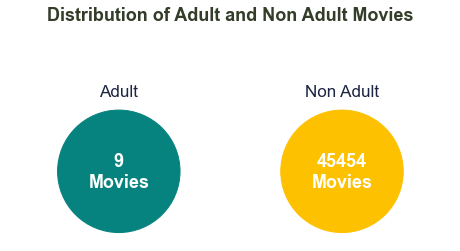

In [10]:
plt.figure(figsize=(8,4))
plt.scatter(x=[0.5, 1.5], y=[1,1], s=15000, color=['#06837f', '#fdc100'])
plt.xlim(0,2)
plt.ylim(0.9,1.2)

plt.title('Distribution of Adult and Non Adult Movies', fontsize=18, weight=600, color='#333d29')
plt.text(0.5, 1, '{}\nMovies'.format(str(len(df[df['adult']=='True']))), va='center', ha='center', fontsize=18, weight=600, color='white')
plt.text(1.5, 1, '{}\nMovies'.format(str(len(df[df['adult']=='False']))), va='center', ha='center', fontsize=18, weight=600, color='white')
plt.text(0.5, 1.11, 'Adult', va='center', ha='center', fontsize=17, weight=500, color='#1c2541')
plt.text(1.5, 1.11, 'Non Adult', va='center', ha='center', fontsize=17, weight=500, color='#1c2541')

plt.axis('off')

In [11]:
df.dropna(inplace=True)

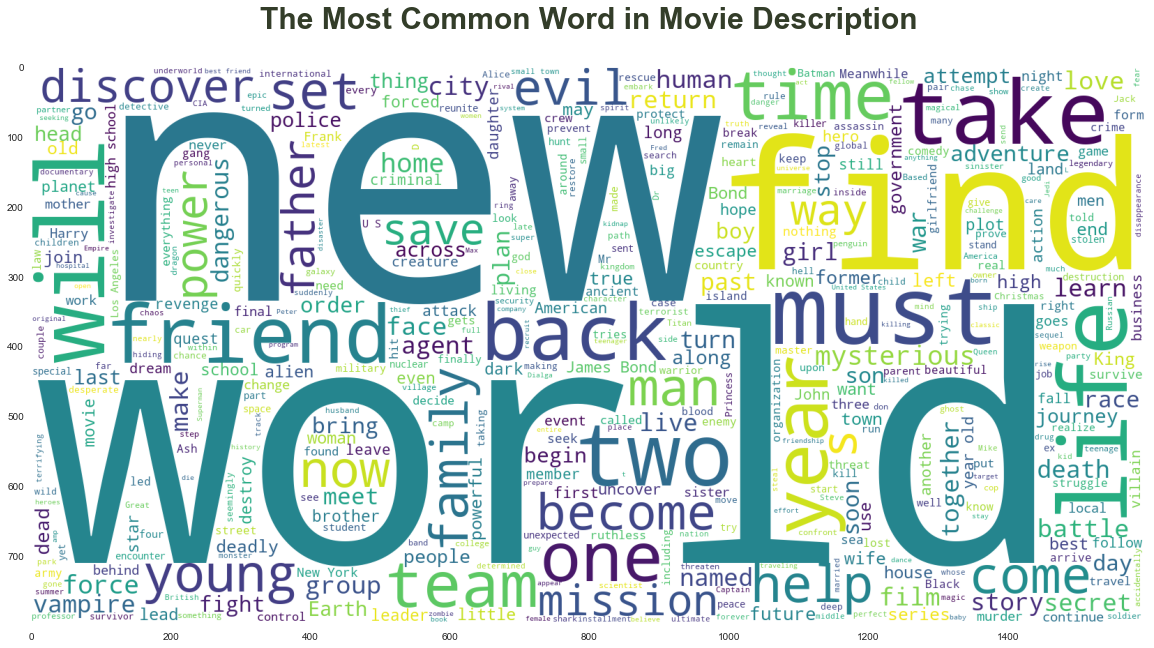

In [12]:
plt.figure(figsize=(20,20))
plt.title('The Most Common Word in Movie Description\n', fontsize=30, weight=600, color='#333d29')
wc = WordCloud(max_words=1000, min_font_size=10,
                height=800,width=1600,background_color="white").generate(' '.join(df['overview']))

plt.imshow(wc)

In [13]:
genres_list = []
for i in df['genres']:
    genres_list.extend(i.split(', '))
df_genre = pd.DataFrame(Counter(genres_list).most_common(10), columns=['genre', 'total'])

In [14]:
df_genre.iplot(x='genre',y='total', kind='bar',title='Most Common Movies Genre',theme="solar")

In [15]:
df.release_date = pd.to_datetime(df.release_date)

Text(0.5, 1.0, 'Movies Released')

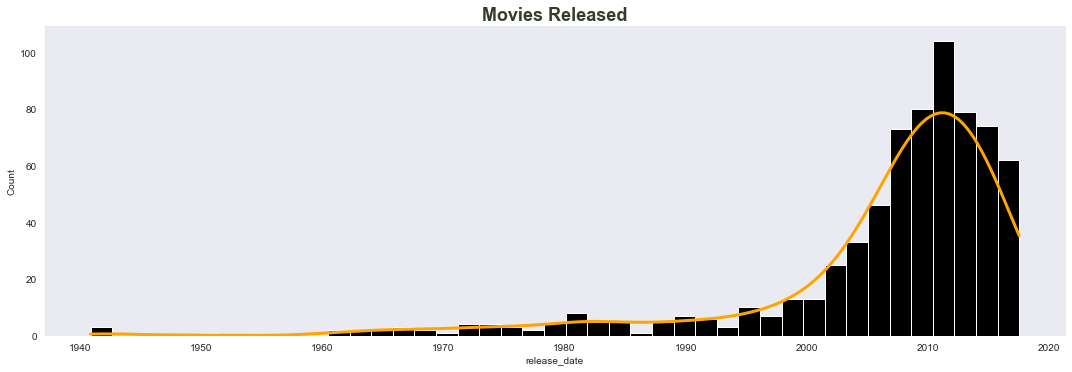

In [16]:
sns.displot(data=df, x='release_date', kind='hist', kde=True,
            color='orange', facecolor='black', edgecolor='white', line_kws={'lw': 3}, aspect=3)
plt.title('Movies Released', fontsize=18, weight=600, color='#333d29')

In [17]:
df.original_language

9        en
68       en
69       en
153      en
178      en
         ..
44274    en
44674    en
44821    ja
44842    en
45029    fr
Name: original_language, Length: 693, dtype: object

In [18]:
lang_list = []
for i in df['original_language']:
    lang_list.append(i)
df_lang = pd.DataFrame(Counter(lang_list).most_common(10), columns=['original_language', 'total'])

In [19]:
df_lang.iplot(x='original_language',y='total', kind='bar',title='Most Common Original Languages In Movies',theme="ggplot",xTitle='Languages',yTitle='Total Count')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 693 entries, 9 to 45029
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   adult                  693 non-null    object        
 1   belongs_to_collection  693 non-null    object        
 2   budget                 693 non-null    object        
 3   genres                 693 non-null    object        
 4   homepage               693 non-null    object        
 5   id                     693 non-null    object        
 6   imdb_id                693 non-null    object        
 7   original_language      693 non-null    object        
 8   original_title         693 non-null    object        
 9   overview               693 non-null    object        
 10  popularity             693 non-null    object        
 11  poster_path            693 non-null    object        
 12  production_companies   693 non-null    object        
 13  pro

Text(0.5, 1.0, 'The Relationship Between Revenue and Popularity')

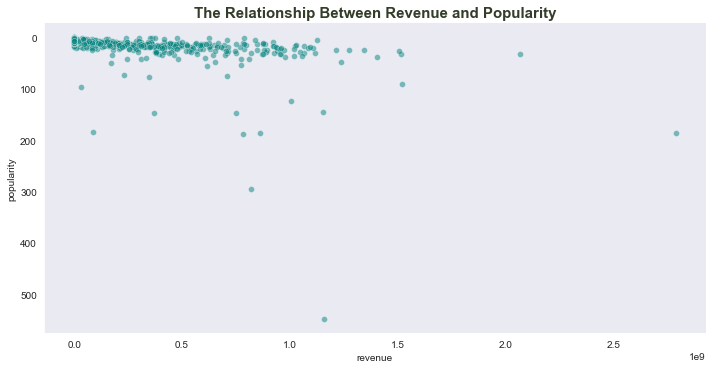

In [21]:
sns.relplot(data=df, x='revenue', y='popularity',
            alpha=.5, aspect=2, color='#06837f')
plt.title('The Relationship Between Revenue and Popularity', fontsize=15, weight=600, color='#333d29')

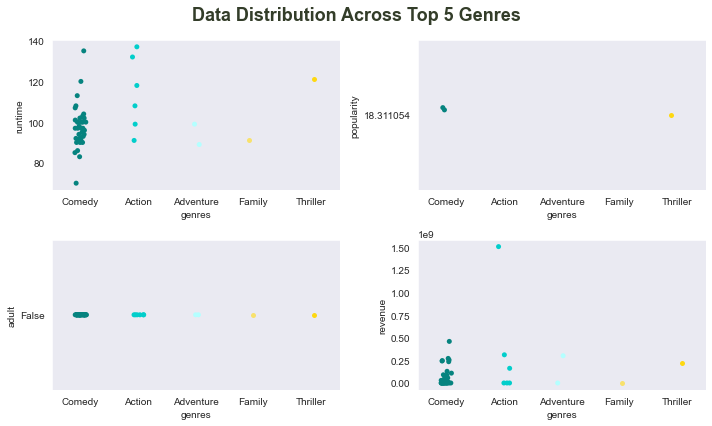

In [22]:
df_plot = pd.DataFrame(Counter(genres_list).most_common(5), columns=['genre', 'total'])
df_plot = df[df['genres'].isin(df_plot['genre'].to_numpy())]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,6))

plt.suptitle('Data Distribution Across Top 5 Genres', fontsize=18, weight=600, color='#333d29')
for i, y in enumerate(['runtime', 'popularity','adult', 'revenue']):
    sns.stripplot(data=df_plot, x='genres', y=y, ax=axes.flatten()[i], palette=['#06837f', '#02cecb', '#b4ffff', '#f8e16c', '#fed811'])

plt.tight_layout()


<AxesSubplot:title={'center':'Correlation of Movie Features\n'}>

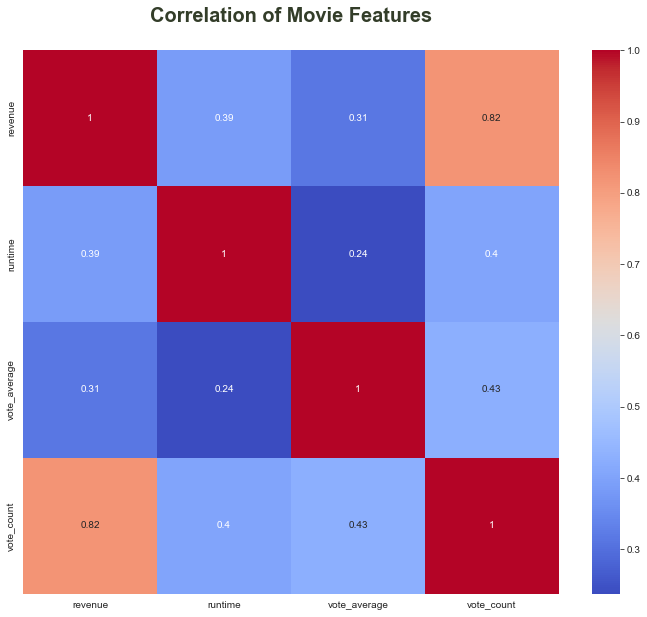

In [23]:
plt.figure(figsize=(12,10))
plt.title('Correlation of Movie Features\n', fontsize=20, weight=800, color='#333d29')
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')

In [49]:
title_mask = df['title'].isna()

In [51]:
df = df.loc[title_mask == False]

In [52]:
df = df.astype({'id': 'int64'})

In [53]:
df2 = pd.merge(rdf, df[['id', 'original_title','vote_average']], left_on='movieId', right_on='id')
df2.head()

,userId,movieId,rating,timestamp,id,original_title,vote_average
0,1,1371,2.5,1260759135,1371,Rocky III,6.6
1,4,1371,4.0,949810302,1371,Rocky III,6.6
2,7,1371,3.0,851869160,1371,Rocky III,6.6
3,19,1371,4.0,855193404,1371,Rocky III,6.6
4,21,1371,3.0,853852263,1371,Rocky III,6.6


In [54]:
df2.drop(['timestamp', 'id'], axis=1, inplace=True)

In [55]:
df2 = df2.drop_duplicates(['userId','original_title'])

In [57]:
df_pivot = df2.pivot(index='userId', columns='original_title', values='vote_average').fillna(0)

In [58]:
df_pivot = df_pivot.astype('int64')

In [59]:
def encode_ratings(x):
    if x<=0:
        return 0
    if x>=1:
        return 1

df_pivot = df_pivot.applymap(encode_ratings)

In [60]:
df_pivot.head()

original_title,!Women Art Revolution,'Gator Bait,'Twas the Night Before Christmas,...Più forte ragazzi!,00 Schneider - Jagd auf Nihil Baxter,10 Items or Less,10 Things I Hate About You,"10,000 BC",11'09''01 - September 11,12 + 1,...,사마리아,야수,연가시,오직 그대만,올드보이,"장화, 홍련",최종병기 활,친절한 금자씨,해안선,활
userId,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from mlxtend.frequent_patterns import apriori

frequent_itemset = apriori(df_pivot, min_support=0.07, use_colnames=True)

C:\Users\inshaal\anaconda3\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning:

DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type



In [ ]:
frequent_itemset.head()

In [ ]:
from mlxtend.frequent_patterns import association_rules

rules = association_rules(frequent_itemset, metric="lift", min_threshold=1)

In [ ]:
from mlxtend.frequent_patterns import association_rules

rules = association_rules(frequent_itemset, metric="lift", min_threshold=1)

In [ ]:
rules.head()

In [ ]:
df_res = rules.sort_values(by=['lift'], ascending=False)
df_res.head()

In [ ]:
df_lb = df_res[df_res['antecedents'].apply(lambda x: len(x) ==1 and next(iter(x)) == 'Le Bossu')]

In [ ]:
df_lb = df_lb[df_lb['lift'] > 2]

In [ ]:
df_lb.head()

In [ ]:
movies = df_lb['consequents'].values

movie_list = []
for movie in movies:
    for title in movie:
        if title not in movie_list:
            movie_list.append(title)

movie_list[0:10]